In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
all_tweets = pd.read_csv("./DataSources/TwitterData/cleaned_tweets.csv")
print(all_tweets.shape)
all_tweets.head()

(19366, 25)


,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,...,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins
0,0,1420355029081395203,2021-07-28 12:06:42,865262041103302656,Chris Myers,myerschrismyer1,Richmond North Yorkshire,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 12:06:42,2021-07-28 12:00:00,28
1,1,1420354120041615364,2021-07-28 12:03:05,229645453,Emily Sheffield,emilysheffield,London,RT @NaheedMajeed: Spot on @standardnews With L...,NaN,NaN,...,['@standardnews'],[],Spot on With London on track to break record...,"['spot', 'on', 'with', 'london', 'on', 'track'...","['spot', 'track', 'break', 'record', 'teenage'...","['spot', 'track', 'break', 'record', 'teenage'...",spot track break record teenage murdersstop se...,2021-07-28 12:03:05,2021-07-28 12:00:00,28
2,2,1420351785156366337,2021-07-28 11:53:49,2843896642,Basilewitch,basilewitch,France,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:53:49,2021-07-28 00:00:00,28
3,3,1420350419449094148,2021-07-28 11:48:23,556315551,Dean Cowcher,DeanCowcher,Bexleyheath London England,RT @LeslieH24367191: 'Do better!' Boris Johnso...,NaN,NaN,...,[],[],Do better Boris Johnson issues scathing respo...,"['do', 'better', 'boris', 'johnson', 'issues',...","['better', 'boris', 'johnson', 'issues', 'scat...","['good', 'boris', 'johnson', 'issues', 'scathi...",good boris johnson issues scathing response sa...,2021-07-28 11:48:23,2021-07-28 00:00:00,28
4,4,1420349615954669574,2021-07-28 11:45:11,1267062754915090434,Alfiecat,sonya_annie,unknown,RT @Short2Cjs: Boris today speaking to Nick Fe...,NaN,NaN,...,[],[],Boris today speaking to Nick Ferrari about Kh...,"['boris', 'today', 'speaking', 'to', 'nick', '...","['boris', 'today', 'speaking', 'nick', 'ferrar...","['boris', 'today', 'speaking', 'nick', 'ferrar...",boris today speaking nick ferrari khan … done ...,2021-07-28 11:45:11,2021-07-28 00:00:00,28


In [3]:
all_tweets = all_tweets.dropna(how='all') # only drops a row when every column is NA
print("shape before after dropping rows with all NaN")
print(all_tweets.shape)

# Now check for individual NaN values
nan_values = all_tweets[all_tweets.isna().any(axis=1)]
print(nan_values.count())

shape before after dropping rows with all NaN
(19366, 25)
index                           19342
tweet_id                        19342
tweet_date                      19342
tweeter_id                      19342
tweeter_user_name               19340
tweeter_screen_name             19342
tweeter_location                19342
message_text                    19342
in_reply_to_user_screen_name     1604
quote_tweet_screen_name           254
favourite_count                 19342
retweet_count                   19342
extract_run_date                19342
retrieved_using_search_term     19342
retweeted                       19342
mentioned                       19342
hashtags                        19342
Tweet_punct                     19342
Tweet_tokenized                 19342
Tweet_nonstop                   19342
Tweet_lemmatized                19342
Clean_MessageText               19341
tweet_date_dt                   19342
time_bins_12h                   19342
day_bins                      

In [4]:
# need to set the in_reply_to_user_screen_name and quote_tweet_screen_name fields to blanks
all_tweets.loc[all_tweets['in_reply_to_user_screen_name'].isna(), 'in_reply_to_user_screen_name'] = ''
all_tweets.loc[all_tweets['quote_tweet_screen_name'].isna(), 'quote_tweet_screen_name'] = ''

# Now check for individual NaN values
nan_values = all_tweets[all_tweets.isna().any(axis=1)]
print(nan_values.count())

nan_values.head()

index                           3
tweet_id                        3
tweet_date                      3
tweeter_id                      3
tweeter_user_name               1
tweeter_screen_name             3
tweeter_location                3
message_text                    3
in_reply_to_user_screen_name    3
quote_tweet_screen_name         3
favourite_count                 3
retweet_count                   3
extract_run_date                3
retrieved_using_search_term     3
retweeted                       3
mentioned                       3
hashtags                        3
Tweet_punct                     3
Tweet_tokenized                 3
Tweet_nonstop                   3
Tweet_lemmatized                3
Clean_MessageText               2
tweet_date_dt                   3
time_bins_12h                   3
day_bins                        3
dtype: int64


,index,tweet_id,tweet_date,tweeter_id,tweeter_user_name,tweeter_screen_name,tweeter_location,message_text,in_reply_to_user_screen_name,quote_tweet_screen_name,...,mentioned,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_lemmatized,Clean_MessageText,tweet_date_dt,time_bins_12h,day_bins
6208,6208,1417805178540105730,2021-07-21 11:14:30,1397801811935956993,Jimmy,Jimmy20723610,Mother Earth,@BraddockBessie https://t.co/23Cde1u6r3\nhttps...,BraddockBessie,,...,['@BraddockBessie'],[],\n\n\n,[],[],[],NaN,2021-07-22 12:59:27,2021-07-22 12:00:00,22
10210,10210,1420847689441419278,2021-07-29 20:44:21,996022000605855744,NaN,SMorris48073327,unknown,RT @GoodLawProject: Government used public mon...,,,...,[],[],Government used public money for polls about ...,"['government', 'used', 'public', 'money', 'for...","['government', 'used', 'public', 'money', 'pol...","['government', 'used', 'public', 'money', 'pol...",government used public money polls keir starme...,2021-07-30 02:22:30,2021-07-30 00:00:00,30
13913,13913,1420680783296176134,2021-07-29 09:41:08,996022000605855744,NaN,SMorris48073327,unknown,RT @GoodLawProject: BREAKING: New emails revea...,,,...,[],[],BREAKING New emails reveal Government used ta...,"['breaking', 'new', 'emails', 'reveal', 'gover...","['breaking', 'new', 'emails', 'reveal', 'gover...","['breaking', 'new', 'emails', 'reveal', 'gover...",breaking new emails reveal government used tax...,2021-07-29 10:33:51,2021-07-29 00:00:00,29


## Building the network of interactions
### This code draws heavily on the work of Bovet
### https://github.com/alexbovet/network_lesson/blob/master/02_Analysis_of_Twitter_Social_Network.ipynb

We will use the python module NetworkX to construct and analyze the social network.

There are four types of interactions between two users in Twitter:
- Retweet
- Quote
- Reply
- Mention

In [5]:
# let's define some functions to extract the interactions from tweets
def string_to_list(my_str):
    delimiter = ","
    my_str = my_str.replace("[", "")
    my_str = my_str.replace("]", "")
    my_str = my_str.replace("@", "")
    my_str = my_str.replace("'", "")
    my_str = my_str.replace(" ", "")
    my_list = my_str.split(delimiter)
    return my_list

def getAllInteractions(tweet):
    
    # Get the tweeter
    tweet_id = tweet.tweet_id
    tweeter_id = tweet.tweeter_id
    tweeter_name = tweet.tweeter_screen_name
    
    # a python set is a collection of unique items
    # we use a set to avoid duplicated ids
    interacting_users = set()
    
    # Add person they're replying to
    if tweet.in_reply_to_user_screen_name != '':
        interacting_users.add(tweet.in_reply_to_user_screen_name)
        
    # Add person they quoted
    if tweet.quote_tweet_screen_name != '':
        interacting_users.add(tweet.quote_tweet_screen_name)
    
    # Add person they retweeted
    if len(tweet.retweeted) > 2: # because empty strings will contain []
        retweeted_list = string_to_list(tweet.retweeted)
        for item in retweeted_list:
            interacting_users.add(item)
       
    # Add mentions
    if len(tweet.mentioned) > 2: # because empty strings will contain []
        mentioned_list = string_to_list(tweet.mentioned)
        for item in mentioned_list:
            interacting_users.add(item)
  
    # remove the tweeter if he is in the set
    interacting_users.discard(tweeter_name)
    
    # Return our tweeter and their influencers
    return tweeter_id, tweeter_name, tweet_id, list(interacting_users)

In [6]:
import networkx as nx

# define an empty Directed Graph
# A directed graph is a graph where edges have a direction
# in our case the edges goes from user that sent the tweet to
# the user with whom they interacted (retweeted, mentioned or quoted)
G = nx.DiGraph()

for index, tweet in all_tweets.iterrows():
    tweeter_id, tweeter_name, tweet_id, interactions = getAllInteractions(tweet)
    
    # add an edge to the Graph for each influencer
    for interact_name in interactions:
        
        # add edges between the two user ids
        # this will create new nodes if the nodes are not already in the network
        # we also add an attribute the to edge equal to the id of the tweet
        G.add_edge(tweeter_name, interact_name, tweet_id=tweet_id)
        
        # add name as a property to each node
        # with networkX each node is a dictionary
        G.nodes[tweeter_name]['name'] = tweeter_name
        G.nodes[interact_name]['name'] = interact_name

In [7]:
# The graph's node are contained in a NodeView which has a dict-like interface
print(type(G.nodes))

<class 'networkx.classes.reportviews.NodeView'>


In [8]:
# the keys are the user_id
nodelist = list(G.nodes.keys())
print(nodelist)

['myerschrismyer1', 'LeslieH24367191', 'emilysheffield', 'standardnews', 'NaheedMajeed', 'basilewitch', 'Short2Cjs', 'DeanCowcher', 'sonya_annie', 'OliverSteinme16', 'Bravescott69', 'Kalimeralynn', 'GM_RayKeene', 'Howwee', 'bramble__jam', 'UncleTrash', 'Sheilamayparke1', 'boblister_poole', 'John27454952', 'linmeitalks', 'darlingvivien', 'becky10002', 'LBC', 'JoRichardsKent', 'NickFerrariLBC', 'Nic', 'RosettaTickner', 'Janet42957897', 'KarlJiAllen', 'neerajsanatani1', 'LeoKearse', 'Morris2906', '527_thatch', 'SadiqKhan', 'philrevis', 'Susanmerryweath', 'parthkopi', 'Alfiebengal', 'Mal_DuBois', 'moore241128', 'Bigjob67643000', 'JuliaHB1', 'lindiloola', 'tamdek', 'FrankBullitt39', 'PAL362', 'AlisonAjt', 'Keir_Starmer', 'DavidNerd', 'Alwof', 'thegingerpig', 'LizardEyeSue', 'CandyNimrod', 'RockerProg', 'Shakermakermatt', 'Peter86628983', 'ianbeach2', 'AmuAlan', 'GillJames54', 'Archer64234817', 'Conservatives', 'AnnaBritannia', 'antiwokeuk', 'porknpicklepie', 'trwill10_tom', 'DnellStephen', 

In [9]:
# each node is itself a dictionary with node attributes as key,value pairs
print(type(G.nodes[nodelist[0]]))
print(G.nodes[nodelist[0]])

<class 'dict'>
{'name': 'myerschrismyer1'}


In [10]:
# edges are contained in a EdgeView with a set-like interface
print(type(G.edges))
print(G.edges())

<class 'networkx.classes.reportviews.OutEdgeView'>
[('myerschrismyer1', 'LeslieH24367191'), ('myerschrismyer1', 'BrexitPartridge'), ('myerschrismyer1', 'LeaveEUOfficial'), ('LeslieH24367191', 'MickeyD44314901'), ('LeslieH24367191', 'DJBURNS_was'), ('LeslieH24367191', 'James_Thorburn'), ('LeslieH24367191', 'benhabib6'), ('LeslieH24367191', 'SadiqKhan'), ('LeslieH24367191', 'ShaunBaileyUK'), ('LeslieH24367191', 'LeaveEUOfficial'), ('LeslieH24367191', 'suemitch2017'), ('LeslieH24367191', 'MayorofLondon'), ('emilysheffield', 'standardnews'), ('emilysheffield', 'NaheedMajeed'), ('emilysheffield', 'nicholascecil'), ('emilysheffield', 'EveningStandard'), ('standardnews', 'Sadiq'), ('NaheedMajeed', 'emilysheffield'), ('NaheedMajeed', 'standardnews'), ('basilewitch', 'Short2Cjs'), ('basilewitch', 'rec777777'), ('basilewitch', 'Keir_Starmer'), ('basilewitch', 'RichardBurgon'), ('basilewitch', 'brexitblog_info'), ('basilewitch', 'MickeyD44314901'), ('basilewitch', 'telegraph'), ('basilewitch', 'T

In [11]:
# we can see all the edges going out of this node
# each edge is a dictionary inside this dictionary with a key 
# corresponding to the target user_id
e = G.out_edges(nodelist[4], data=True)
print(nodelist[4])
print(e)

NaheedMajeed
[('NaheedMajeed', 'emilysheffield', {'tweet_id': 1420106862935093250}), ('NaheedMajeed', 'standardnews', {'tweet_id': 1420106862935093250})]


In [12]:
# we can iterate over the out-edges 
for s,t,data in e:
    print(s,t,data)

NaheedMajeed emilysheffield {'tweet_id': 1420106862935093250}
NaheedMajeed standardnews {'tweet_id': 1420106862935093250}


In [13]:
G.number_of_nodes()

15336

In [14]:
G.number_of_edges()

20501

In [15]:
# dictionary with the degree of all nodes
all_degrees = [G.degree(n) for n in nodelist] # this is the degree for undirected edges
in_degrees = [G.in_degree(n) for n in nodelist]
out_degrees = [G.out_degree(n) for n in nodelist]

In [16]:
# average degree
2*G.number_of_edges()/G.number_of_nodes()

2.6735785080855505

In [17]:
import numpy as np
np.array(all_degrees).mean()

2.6735785080855505

In [18]:
np.array(out_degrees).mean()

1.3367892540427753

In [19]:
# we want to make a list with (user_id, username, degree) for all nodes
degree_node_list = []
for node in nodelist:
    degree_node_list.append((node, G.nodes[node]['name'], G.degree(node)))
    
print('Unordered user, degree list')    
print(degree_node_list[:10])

# sort the list according the degree in descinding order
degree_node_list = sorted(degree_node_list, key=lambda x:x[2], reverse=True)
print('Ordered user, degree list')    
print(degree_node_list[:10])

Unordered user, degree list
[('myerschrismyer1', 'myerschrismyer1', 3), ('LeslieH24367191', 'LeslieH24367191', 101), ('emilysheffield', 'emilysheffield', 24), ('standardnews', 'standardnews', 154), ('NaheedMajeed', 'NaheedMajeed', 4), ('basilewitch', 'basilewitch', 9), ('Short2Cjs', 'Short2Cjs', 9), ('DeanCowcher', 'DeanCowcher', 3), ('sonya_annie', 'sonya_annie', 2), ('OliverSteinme16', 'OliverSteinme16', 4)]
Ordered user, degree list
[('GoodLawProject', 'GoodLawProject', 4079), ('KoolKat1025', 'KoolKat1025', 911), ('LeoKearse', 'LeoKearse', 629), ('SadiqKhan', 'SadiqKhan', 551), ('LeaveEUOfficial', 'LeaveEUOfficial', 537), ('MayorofLondon', 'MayorofLondon', 390), ('BrexitBassist', 'BrexitBassist', 317), ('PoliticsJOE_UK', 'PoliticsJOE_UK', 314), ('mariannaspring', 'mariannaspring', 294), ('PoliticsForAlI', 'PoliticsForAlI', 240)]


In [20]:
# we need to import matplolib for making plots
# and numpy for numerical computations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Network components (taken verbatim from Bovet)
For <b> directed </b> graphs we can define two types of components:
- Weakly connected components
- Strongly connected components

Weakly connected component (WCC): maximal set of nodes where there exists a path in at least one direction between each pair of nodes.

Strongly connected component (SCC): maximal set of nodes where there exists a path in both directions between each pair of nodes.

Weakly connected giant (largest) component (WCGC): Largest WCC Strongly connected giant (largest) component (SCGC): Largest SCC

<img src="WCGC-SCGC.png">

In [21]:
# this returns a list of set of nodes belonging to the 
# different (weakly) connected components
components = list(nx.weakly_connected_components(G))

# sort the component according to their size
components = list(sorted(components, key=lambda x:len(x), reverse=True))

In [22]:
# make a list with the size of each component
comp_sizes = []
for comp in components:
    comp_sizes.append(len(comp))

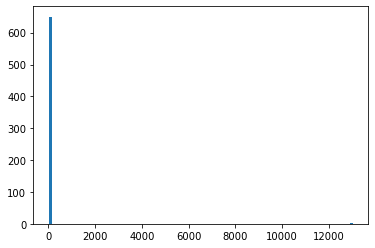

In [23]:
# plot the histogram of component sizes
hist = plt.hist(comp_sizes, bins=100)

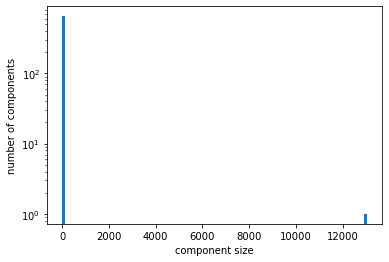

In [24]:
# histogram with logarithmic y scale
hist = plt.hist(comp_sizes, bins=100, log=True)
tx = plt.xlabel('component size')
ty = plt.ylabel('number of components')

In [25]:
# sizes of the ten largest components
comp_sizes[:10]

[13032, 88, 43, 31, 26, 23, 21, 18, 17, 16]

In [26]:
# let's make a new graph which is the subgraph of G corresponding to 
# the largest connected component
# let's find the largest component
largest_comp = components[0]
LCC = G.subgraph(largest_comp)

In [27]:
G.number_of_nodes()

15336

In [28]:
LCC.number_of_nodes()

13032

In [29]:
# let's plot the degree distribution inside the LCC
degrees = [LCC.degree(n) for n in LCC.nodes()]
degrees

[3,
 101,
 24,
 154,
 4,
 9,
 9,
 3,
 2,
 4,
 2,
 3,
 2,
 4,
 2,
 63,
 3,
 8,
 1,
 1,
 237,
 3,
 52,
 2,
 2,
 5,
 6,
 1,
 629,
 4,
 1,
 551,
 1,
 2,
 1,
 1,
 4,
 2,
 1,
 15,
 2,
 2,
 3,
 8,
 1,
 121,
 1,
 1,
 11,
 4,
 4,
 4,
 2,
 6,
 1,
 2,
 10,
 3,
 13,
 1,
 46,
 14,
 4,
 6,
 1,
 40,
 3,
 5,
 2,
 4,
 6,
 2,
 8,
 1,
 2,
 1,
 1,
 12,
 9,
 1,
 5,
 1,
 1,
 1,
 8,
 3,
 3,
 2,
 7,
 2,
 8,
 7,
 2,
 210,
 10,
 2,
 34,
 2,
 2,
 172,
 1,
 7,
 6,
 2,
 3,
 5,
 3,
 1,
 23,
 2,
 2,
 1,
 1,
 3,
 3,
 4,
 24,
 1,
 2,
 9,
 5,
 4,
 5,
 1,
 2,
 30,
 5,
 2,
 1,
 1,
 3,
 9,
 2,
 2,
 1,
 6,
 6,
 3,
 390,
 2,
 3,
 1,
 1,
 22,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 8,
 1,
 3,
 2,
 61,
 1,
 1,
 3,
 2,
 1,
 3,
 2,
 11,
 1,
 1,
 1,
 1,
 1,
 1,
 8,
 4,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 25,
 3,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 2

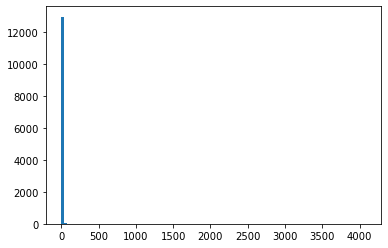

In [30]:

degree_array = np.array(degrees)
hist = plt.hist(degree_array, bins=100)

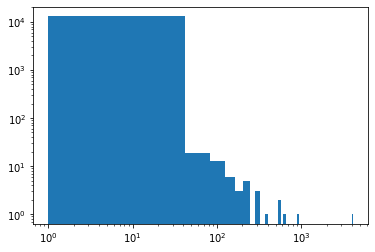

In [31]:

# using logarithmic scales
hist = plt.hist(degree_array, bins=100, log=True)
plt.xscale('log')

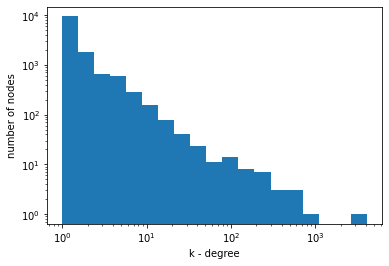

In [32]:
# logarithmic scale with logarithmic bins
N, bins, patches = plt.hist(degree_array, bins=np.logspace(0,np.log10(degree_array.max()+1), 20), log=True)
plt.xscale('log')
tx = plt.xlabel('k - degree')
ty= plt.ylabel('number of nodes')

1.0


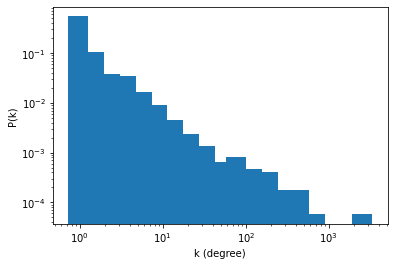

In [33]:
# Degree probability distribution (P(k))

# since we have logarithmic bins, we need to
# take into account the fact that the bins 
# have different lenghts when normalizing
bin_lengths = np.diff(bins) # lenght of each bin

summ = np.sum(N*bin_lengths)
normalized_degree_dist = N/summ

# check normalization:
print(np.sum(normalized_degree_dist*bin_lengths))

hist = plt.bar(bins[:-1], normalized_degree_dist, width=np.diff(bins))
plt.xscale('log')
plt.yscale('log')
tx = plt.xlabel('k (degree)')
ty = plt.ylabel('P(k)')

In [34]:
import random

def getGCsize(G):
    """ returns the size of the largest component of G"""
        
    return len(max(nx.connected_components(G), key=len))

In [35]:
# list that will contain the size of the GC as we remove nodes
rnd_attack_GC_sizes = []

# we take into account the undirected version of the graph
LCCundirected = nx.Graph(LCC)

nodes_list = list(LCCundirected.nodes())


while len(nodes_list) > 1:
    # add the size of the  current GC
    rnd_attack_GC_sizes.append(getGCsize(LCCundirected))
    
    # pick a random node
    rnd_node = random.choice(nodes_list)
    # remove from graph
    LCCundirected.remove_node(rnd_node)
    # remove from node list
    nodes_list.remove(rnd_node)

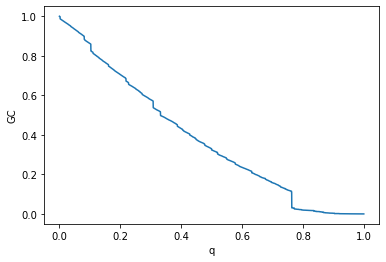

In [36]:
# convert list to numpy array
rnd_attack_GC_sizes = np.array(rnd_attack_GC_sizes)

# normalize by the initial size of the GC
GC_rnd = rnd_attack_GC_sizes/rnd_attack_GC_sizes[0]

# fraction of removed nodes
q = np.linspace(0,1,num=GC_rnd.size)

plt.plot(q,GC_rnd)
tx = plt.xlabel('q')
ty = plt.ylabel('GC')

In [37]:
# high degree attack
LCCundirected = nx.Graph(LCC)

# list of pairs (node, degree) sorted according the degree
node_deg_dict = dict(nx.degree(LCCundirected))
nodes_sorted = sorted(node_deg_dict, key=node_deg_dict.get)

# list that will contain the size of the GC as we remove nodes
hd_attack_GC_sizes = []

while len(nodes_sorted) > 1:
    
    hd_attack_GC_sizes.append(getGCsize(LCCundirected))
    
    #remove node according to their degree
    node = nodes_sorted.pop() # pop() removes and returns the last element
    LCCundirected.remove_node(node)

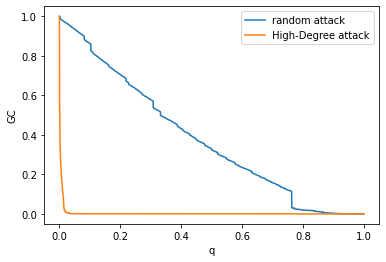

In [38]:
hd_attack_GC_sizes = np.array(hd_attack_GC_sizes)
GC_hd = hd_attack_GC_sizes/hd_attack_GC_sizes[0]
q = np.linspace(0,1,num=GC_hd.size)

plt.plot(q,GC_rnd, label='random attack')
plt.plot(q,GC_hd, label='High-Degree attack')
tx = plt.xlabel('q')
ty = plt.ylabel('GC')
_ = plt.legend()

In [39]:
#teleportation probability
alpha = 0.15

#adjacency matrix
nodelist = list(G.nodes())
A = nx.to_numpy_array(G, nodelist=nodelist)

#diagonal matrix of out degrees
deg_out_vect = np.array([float(max(G.out_degree(n),1)) for n in nodelist])
D_out_inv = np.diag(1/deg_out_vect)

# teleportation transition matrix
N = A.shape[1]
S = np.ones((N,N))*1/N

# full transition matrix
M = (1-alpha)*D_out_inv @ A + alpha*S

# for dangling nodes (nodes without out-edges), we force the random teleportation
dangling_nodes = np.where(A.sum(1) == 0)[0]
M[dangling_nodes,:] = S[dangling_nodes,:]

#initial walker distribution and 1st iteration
p_last = np.ones(N)*1/N
p = np.matmul(p_last, M)

# iterate until sufficient convergence
eps = 1.0e-8
i = 1
while np.linalg.norm(p - p_last, 2) > eps:
        p_last = p
        p = np.matmul(p, M)
        i += 1

print(i)

90


In [40]:
pg_ranking = np.array(np.argsort(p)[::-1])

pagerank_values = p[pg_ranking]
nodes_pagerank = [nodelist[r] for r in pg_ranking]
nodes_pagerank[:20]

['GoodLawProject',
 'LBC',
 'NickFerrariLBC',
 'KoolKat1025',
 'LeoKearse',
 'SadiqKhan',
 'LeaveEUOfficial',
 'MayorofLondon',
 'PoliticsJOE_UK',
 'mariannaspring',
 'PrisonPlanet',
 'BrexitBassist',
 'PoliticsForAlI',
 'Sadiq',
 'TJ_Knight',
 'ashindestad',
 'standardnews',
 'metpoliceuk',
 'talkRADIO',
 'antiwokeuk']

In [41]:
names_pagerank = [G.nodes[n]['name'] for n in nodes_pagerank]
names_pagerank[:20]

['GoodLawProject',
 'LBC',
 'NickFerrariLBC',
 'KoolKat1025',
 'LeoKearse',
 'SadiqKhan',
 'LeaveEUOfficial',
 'MayorofLondon',
 'PoliticsJOE_UK',
 'mariannaspring',
 'PrisonPlanet',
 'BrexitBassist',
 'PoliticsForAlI',
 'Sadiq',
 'TJ_Knight',
 'ashindestad',
 'standardnews',
 'metpoliceuk',
 'talkRADIO',
 'antiwokeuk']

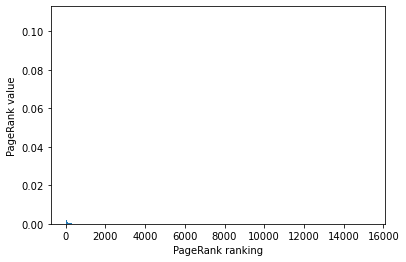

In [42]:
hist = plt.bar(np.arange(p.shape[0]),np.sort(p)[::-1])
ty = plt.ylabel('PageRank value')
tx = plt.xlabel('PageRank ranking')

In [43]:
# pagerank is a probability density
pagerank_values.sum()

1.0000000000005578

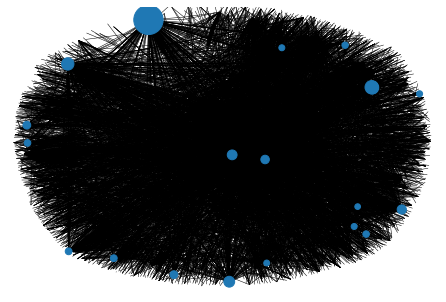

In [44]:
# draw the network of the top 20 nodes
nx.draw(G, nodelist=nodes_pagerank[:20], node_size=8000*pagerank_values[:20],width=0.5, arrows=False)

In [45]:
# First let's add the pagerank value as a node attribute
for n, pr in zip(nodes_pagerank,pagerank_values):
    if n in LCC:
        LCC.nodes[n]['page_rank'] = pr

In [46]:
nx.write_gexf(LCC, 'twitter_lcc.gexf')

In [47]:
nodes_pagerank[:20]

['GoodLawProject',
 'LBC',
 'NickFerrariLBC',
 'KoolKat1025',
 'LeoKearse',
 'SadiqKhan',
 'LeaveEUOfficial',
 'MayorofLondon',
 'PoliticsJOE_UK',
 'mariannaspring',
 'PrisonPlanet',
 'BrexitBassist',
 'PoliticsForAlI',
 'Sadiq',
 'TJ_Knight',
 'ashindestad',
 'standardnews',
 'metpoliceuk',
 'talkRADIO',
 'antiwokeuk']